In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('Downloads/jamb_exam_results.csv')
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [34]:
df.dtypes

JAMB_Score                        int64
Study_Hours_Per_Week              int64
Attendance_Rate                   int64
Teacher_Quality                   int64
Distance_To_School              float64
School_Type                      object
School_Location                  object
Extra_Tutorials                  object
Access_To_Learning_Materials     object
Parent_Involvement               object
IT_Knowledge                     object
Student_ID                        int64
Age                               int64
Gender                           object
Socioeconomic_Status             object
Parent_Education_Level           object
Assignments_Completed             int64
dtype: object

In [36]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

del df['student_id']

In [37]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)


y_train = df_train['jamb_score']
y_val = df_val['jamb_score']
y_test = df_test['jamb_score']


del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [38]:
df_train.isnull().sum()

study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          540
assignments_completed             0
dtype: int64

In [39]:
df_train.parent_education_level.unique()

array([nan, 'Secondary', 'Tertiary', 'Primary'], dtype=object)

In [40]:
len(df_train), len(df_val), len(df_test)

(3000, 1000, 1000)

In [41]:
df_train['parent_education_level'] = df_train['parent_education_level'].fillna('Unknown')
df_val['parent_education_level'] = df_val['parent_education_level'].fillna('Unknown')
df_test['parent_education_level'] = df_test['parent_education_level'].fillna('Unknown')

In [43]:
from sklearn.feature_extraction import DictVectorizer

# Initialize DictVectorizer with sparse=True
dv = DictVectorizer(sparse=True)

# Convert dataframes to dictionaries and apply DictVectorizer
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)


In [44]:
from sklearn.tree import DecisionTreeRegressor

# Initialize DecisionTreeRegressor with max_depth=1
dt = DecisionTreeRegressor(max_depth=1, random_state=1)

# Train the model on the training data
dt.fit(X_train, y_train)

# Access the feature used for the split
feature_names = dv.get_feature_names_out()
split_feature_index = dt.tree_.feature[0]  # Index of the feature used for the split
split_feature_name = feature_names[split_feature_index]

print(f"The feature used for splitting the data is: {split_feature_name}")


The feature used for splitting the data is: study_hours_per_week


In [45]:
feature_names

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary',
       'parent_education_level=Unknown', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [52]:
from sklearn.tree import DecisionTreeRegressor

# Initialize DecisionTreeRegressor with max_depth=1
dt = DecisionTreeRegressor(max_depth=1, random_state=1)

# Train the model on the training data
dt.fit(X_train, y_train)

# Access the feature used for the split
feature_names = dv.get_feature_names_out()
split_feature_index = dt.tree_.feature[0]  # Index of the feature used for the split
split_feature_name = feature_names[split_feature_index]

print(f"The feature used for splitting the data is: {split_feature_name}")

# dt.tree_.feature

The feature used for splitting the data is: study_hours_per_week


### Q1 study_hours_per_week

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# Train the model on the training set
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf.predict(X_val)

# Calculate RMSE
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"RMSE on validation set: {rmse_val:.3f}")



RMSE on validation set: 41.790


In [58]:
ests = []
rmses = []

for est in range(10,201,10):
    rf = RandomForestRegressor(n_estimators=est, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
    ests.append(est)
    rmses.append(rmse_val)
    print('%4s -> %.3f' % (est, rmse_val))

  10 -> 41.790
  20 -> 41.209
  30 -> 40.922
  40 -> 40.770
  50 -> 40.726
  60 -> 40.663
  70 -> 40.605
  80 -> 40.470
  90 -> 40.446
 100 -> 40.423
 110 -> 40.463
 120 -> 40.509
 130 -> 40.493
 140 -> 40.433
 150 -> 40.417
 160 -> 40.432
 170 -> 40.449
 180 -> 40.453
 190 -> 40.441
 200 -> 40.461


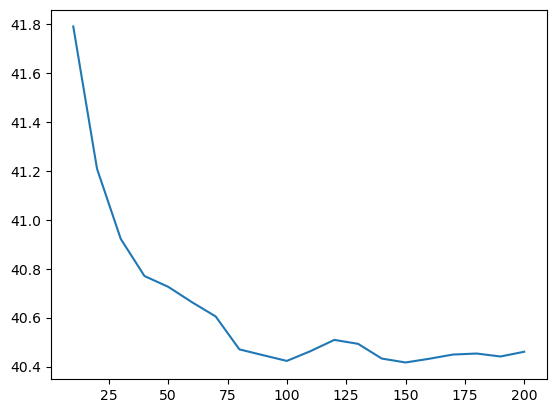

In [59]:
plt.plot(ests, rmses)

In [63]:
 y_val

913     204
1288    147
3551    199
2532    134
2678    222
       ... 
924     185
3282    133
2067    158
4332    244
4559    233
Name: jamb_score, Length: 1000, dtype: int64

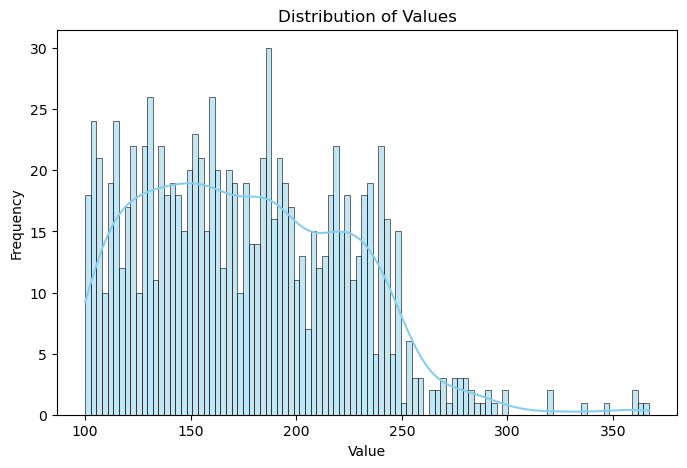

In [65]:
plt.figure(figsize=(8, 5))
sns.histplot( y_val, kde=True, bins=100, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values')
plt.show()

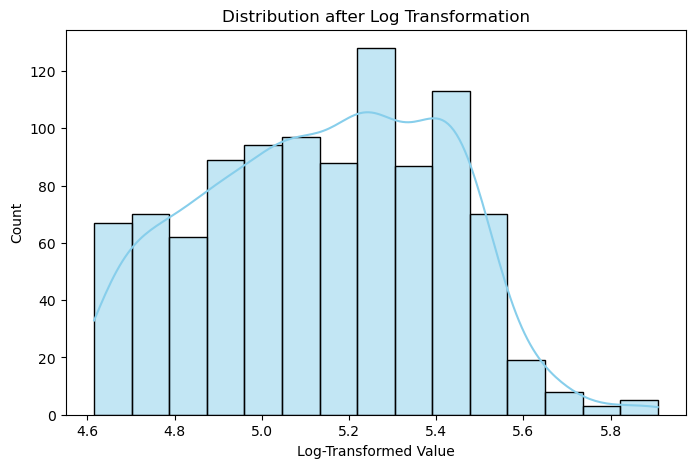

In [66]:
log_data = np.log1p(y_val)  # equivalent to log(data + 1)

# Plot the transformed data
plt.figure(figsize=(8, 5))
sns.histplot(log_data, kde=True, color='skyblue')
plt.xlabel('Log-Transformed Value')
plt.title('Distribution after Log Transformation')
plt.show()

In [67]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize lists to store results
n_estimators_range = range(10, 210, 10)
rmse_scores = []

# Loop over values of n_estimators
for n in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)  # Train the model
    
    # Predict on validation data and calculate RMSE
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append((n, rmse))

# Find the optimal n_estimators value
for i in range(1, len(rmse_scores)):
    if round(rmse_scores[i][1], 3) >= round(rmse_scores[i-1][1], 3):
        optimal_n = rmse_scores[i-1][0]
        break

print(f"Optimal n_estimators where RMSE stops improving: {optimal_n}")


Optimal n_estimators where RMSE stops improving: 100


In [68]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Parameters to try
max_depth_values = [10, 15, 20, 25]
n_estimators_range = range(10, 210, 10)

# Dictionary to store mean RMSE for each max_depth
mean_rmse_results = {}

for max_depth in max_depth_values:
    rmse_scores = []  # Store RMSEs for different n_estimators
    
    for n_estimators in n_estimators_range:
        # Train a RandomForestRegressor with given max_depth and n_estimators
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        
        # Calculate RMSE on the validation set
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)
    
    # Calculate the mean RMSE for this max_depth
    mean_rmse = np.mean(rmse_scores)
    mean_rmse_results[max_depth] = mean_rmse  # Store in dictionary

# Find the best max_depth based on the minimum mean RMSE
best_max_depth = min(mean_rmse_results, key=mean_rmse_results.get)
best_mean_rmse = mean_rmse_results[best_max_depth]

print(f"Best max_depth: {best_max_depth} with mean RMSE: {best_mean_rmse:.3f}")


Best max_depth: 10 with mean RMSE: 40.332


In [69]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

# Train the model on the training data
rf.fit(X_train, y_train)

# Extract feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame to map features to their importance scores
feature_names = dv.get_feature_names_out()  # Get feature names from DictVectorizer
importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Filter for the features of interest
important_features = importances_df[importances_df['feature'].isin(["study_hours_per_week", "attendance_rate", "teacher_quality", "distance_to_school"])]

# Find the most important feature
most_important_feature = important_features.sort_values(by="importance", ascending=False).iloc[0]

print(f"The most important feature is: {most_important_feature['feature']} with importance: {most_important_feature['importance']:.3f}")


The most important feature is: study_hours_per_week with importance: 0.246


In [72]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample Data Preparation (replace this with your actual data)
# X_train, X_val, y_train, y_val should be defined as your datasets
# Example:
# from sklearn.model_selection import train_test_split
# X, y = ...  # Load your features and target variable
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for train and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Create a watchlist
watchlist = [(dtrain, 'train'), (dval, 'eval')]

# Set initial parameters
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Train the model with eta = 0.3
model_03 = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

# Make predictions for eta = 0.3
preds_03 = model_03.predict(dval)

# Calculate RMSE for eta = 0.3
rmse_03 = np.sqrt(mean_squared_error(y_val, preds_03))
print(f'RMSE for eta = 0.3: {rmse_03}')

# Change eta to 0.1
xgb_params['eta'] = 0.1

# Train the model with eta = 0.1
model_01 = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

# Make predictions for eta = 0.1
preds_01 = model_01.predict(dval)

# Calculate RMSE for eta = 0.1
rmse_01 = np.sqrt(mean_squared_error(y_val, preds_01))
print(f'RMSE for eta = 0.1: {rmse_01}')

# Compare RMSE scores
if rmse_03 < rmse_01:
    print("eta = 0.3 leads to the best RMSE score.")
else:
    print("eta = 0.1 leads to the best RMSE score.")


[0]	train-rmse:42.69384	eval-rmse:44.89114
[1]	train-rmse:39.83326	eval-rmse:43.07010
[2]	train-rmse:37.94542	eval-rmse:42.00332
[3]	train-rmse:36.56125	eval-rmse:41.46452
[4]	train-rmse:35.44252	eval-rmse:40.88896
[5]	train-rmse:34.57756	eval-rmse:40.69096
[6]	train-rmse:33.84230	eval-rmse:40.59315
[7]	train-rmse:33.25929	eval-rmse:40.47993
[8]	train-rmse:32.79415	eval-rmse:40.45326
[9]	train-rmse:32.16019	eval-rmse:40.43929
[10]	train-rmse:31.63404	eval-rmse:40.48319
[11]	train-rmse:31.17673	eval-rmse:40.68201
[12]	train-rmse:30.87313	eval-rmse:40.63522
[13]	train-rmse:30.30310	eval-rmse:40.70983
[14]	train-rmse:30.00098	eval-rmse:40.78133
[15]	train-rmse:29.41497	eval-rmse:40.86107
[16]	train-rmse:29.25816	eval-rmse:40.96580
[17]	train-rmse:28.59378	eval-rmse:41.12190
[18]	train-rmse:28.27990	eval-rmse:41.14360
[19]	train-rmse:27.94572	eval-rmse:41.22835
[20]	train-rmse:27.49658	eval-rmse:41.27921
[21]	train-rmse:27.25449	eval-rmse:41.32427
[22]	train-rmse:27.06652	eval-rmse:41.4188